<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Customer-Segmentation---Monthly-Analysis-Method:" data-toc-modified-id="Customer-Segmentation---Monthly-Analysis-Method:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Customer Segmentation - Monthly Analysis Method:</a></span><ul class="toc-item"><li><span><a href="#Create-the-montly-spending-table." data-toc-modified-id="Create-the-montly-spending-table.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create the montly spending table.</a></span></li><li><span><a href="#Pivot-montly-spending-table-by-&quot;YearMonth&quot;-column-and-&quot;Revenue&quot;-values." data-toc-modified-id="Pivot-montly-spending-table-by-&quot;YearMonth&quot;-column-and-&quot;Revenue&quot;-values.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Pivot montly spending table by "YearMonth" column and "Revenue" values.</a></span></li><li><span><a href="#Calculate-and-add-the-total-spendings-of-each-Customer-to-the-pivot-table" data-toc-modified-id="Calculate-and-add-the-total-spendings-of-each-Customer-to-the-pivot-table-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Calculate and add the total spendings of each Customer to the pivot table</a></span></li><li><span><a href="#Add-&quot;CountMonthsShoped&quot;-and-&quot;ShoppingPercentage&quot;-features-to-pivot-table." data-toc-modified-id="Add-&quot;CountMonthsShoped&quot;-and-&quot;ShoppingPercentage&quot;-features-to-pivot-table.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Add "CountMonthsShoped" and "ShoppingPercentage" features to pivot table.</a></span></li><li><span><a href="#Define-Customer-Segmentation-Criteria/Conditions:" data-toc-modified-id="Define-Customer-Segmentation-Criteria/Conditions:-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Define Customer Segmentation Criteria/Conditions:</a></span></li><li><span><a href="#Segment-Customers-by-pre-defined-criteria/conditions" data-toc-modified-id="Segment-Customers-by-pre-defined-criteria/conditions-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Segment Customers by pre-defined criteria/conditions</a></span></li></ul></li><li><span><a href="#Conclusion:" data-toc-modified-id="Conclusion:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion:</a></span></li></ul></div>

<p style="color: blue; font-weight: bold; font-size: 24px;">PART II – AN ALTERNATIVE APPROACH TO RFM ANALYSIS</p>

<p style="color: red; text-align: center; font-weight: bold; font-size: 24px;">CUSTOMER SEGMENTATION WITH MONTHLY ANALYSIS</p>

# Data Preparation 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
df = pd.read_csv("Online Retail.csv")        
df.drop(columns="Unnamed: 0", inplace=True) 

In [5]:
df = df[~df.duplicated()]

In [6]:
df = df.dropna(subset=['CustomerID'])

In [7]:
print(df.isnull().sum().sort_values(ascending=False))

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [8]:
df[(df.Quantity < 0) | (df.UnitPrice < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1.00,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.00,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556.0,PLASTERS IN TIN CIRCUS PARADE,-12.00,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984.0,PACK OF 12 PINK PAISLEY TISSUES,-24.00,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983.0,PACK OF 12 BLUE PAISLEY TISSUES,-24.00,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144.0,ZINC T-LIGHT HOLDER STARS SMALL,-11.00,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
541541,C581499,M,Manual,-1.00,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
541715,C581568,21258.0,VICTORIAN SEWING BOX LARGE,-5.00,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
541716,C581569,84978.0,HANGING HEART JAR T-LIGHT HOLDER,-1.00,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


In [9]:
# With this operation, we can drop the lines containing canceled orders.
df = df[(df.Quantity > 0) & (df.UnitPrice > 0)]

In [10]:
# Create a TotalSales Column if there is not in the data set:
df["Revenue"] = df["UnitPrice"] * df["Quantity"]

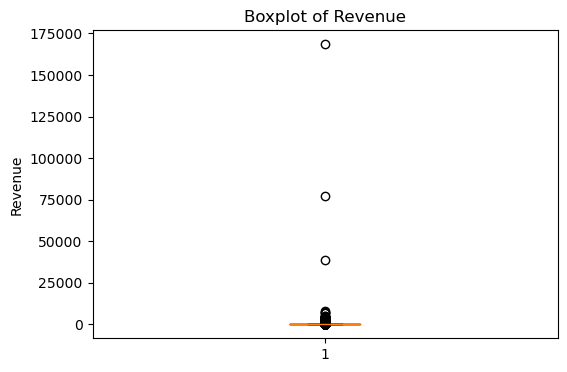

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.boxplot(df['Revenue'])
plt.title('Boxplot of Revenue')  # Grafiğin başlığı
plt.ylabel('Revenue')  # Y ekseninin etiketi
plt.show()

In [12]:
df[(df.Revenue>25000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
61619,541431.0,23166.0,MEDIUM CERAMIC TOP STORAGE JAR,74215.00,2011-01-18 10:01:00,1.04,12346.00,United Kingdom,77183.60
222680,556444.0,22502.0,PICNIC BASKET WICKER 60 PIECES,60.00,2011-06-10 15:28:00,649.50,15098.00,United Kingdom,38970.00
540421,581483.0,23843.0,"PAPER CRAFT , LITTLE BIRDIE",80995.00,2011-12-09 09:15:00,2.08,16446.00,United Kingdom,168469.60


In [13]:
# Convert the 'InvoiceDate' column to the datetime data type.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.00,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365.0,71053.0,WHITE METAL LANTERN,6.00,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.00,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.00,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.00,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587.0,22613.0,PACK OF 20 SPACEBOY NAPKINS,12.00,2011-12-09 12:50:00,0.85,12680.00,France,10.20
541905,581587.0,22899.0,CHILDREN'S APRON DOLLY GIRL,6.00,2011-12-09 12:50:00,2.10,12680.00,France,12.60
541906,581587.0,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4.00,2011-12-09 12:50:00,4.15,12680.00,France,16.60
541907,581587.0,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4.00,2011-12-09 12:50:00,4.15,12680.00,France,16.60


# Customer Segmentation - Monthly Analysis Method:

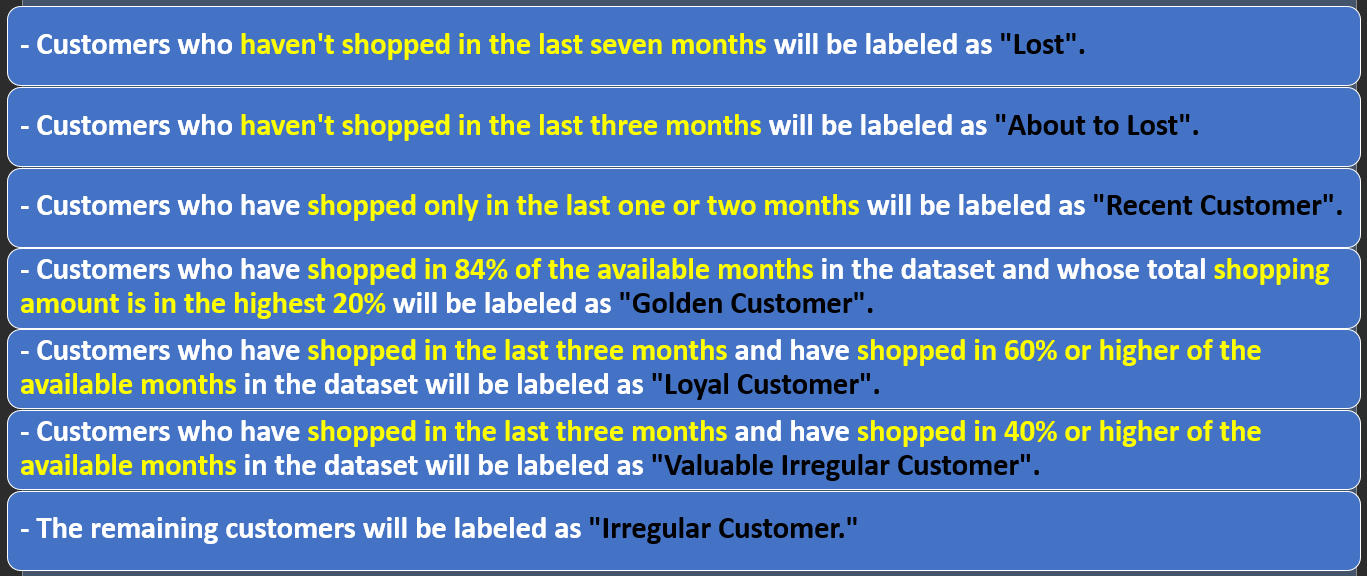

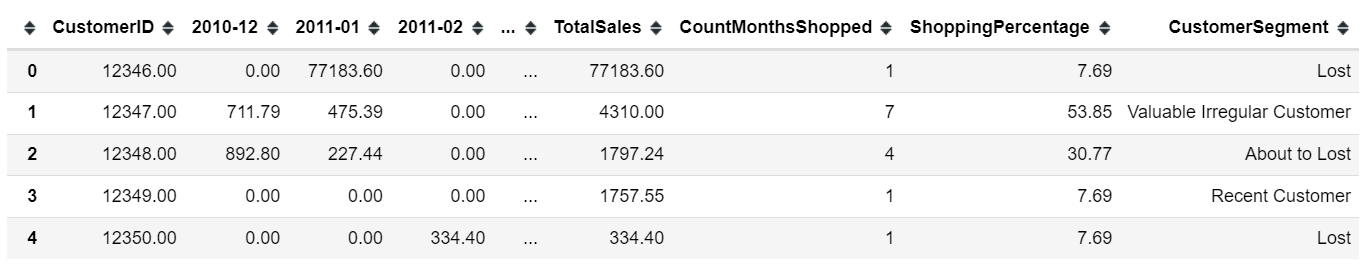

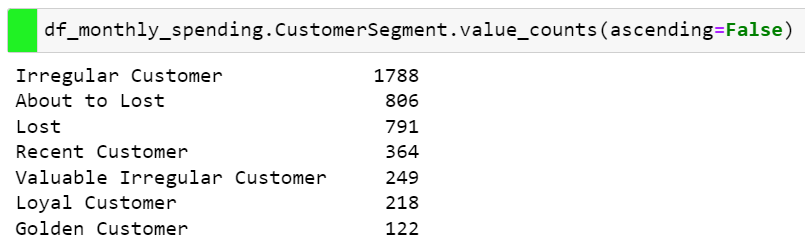

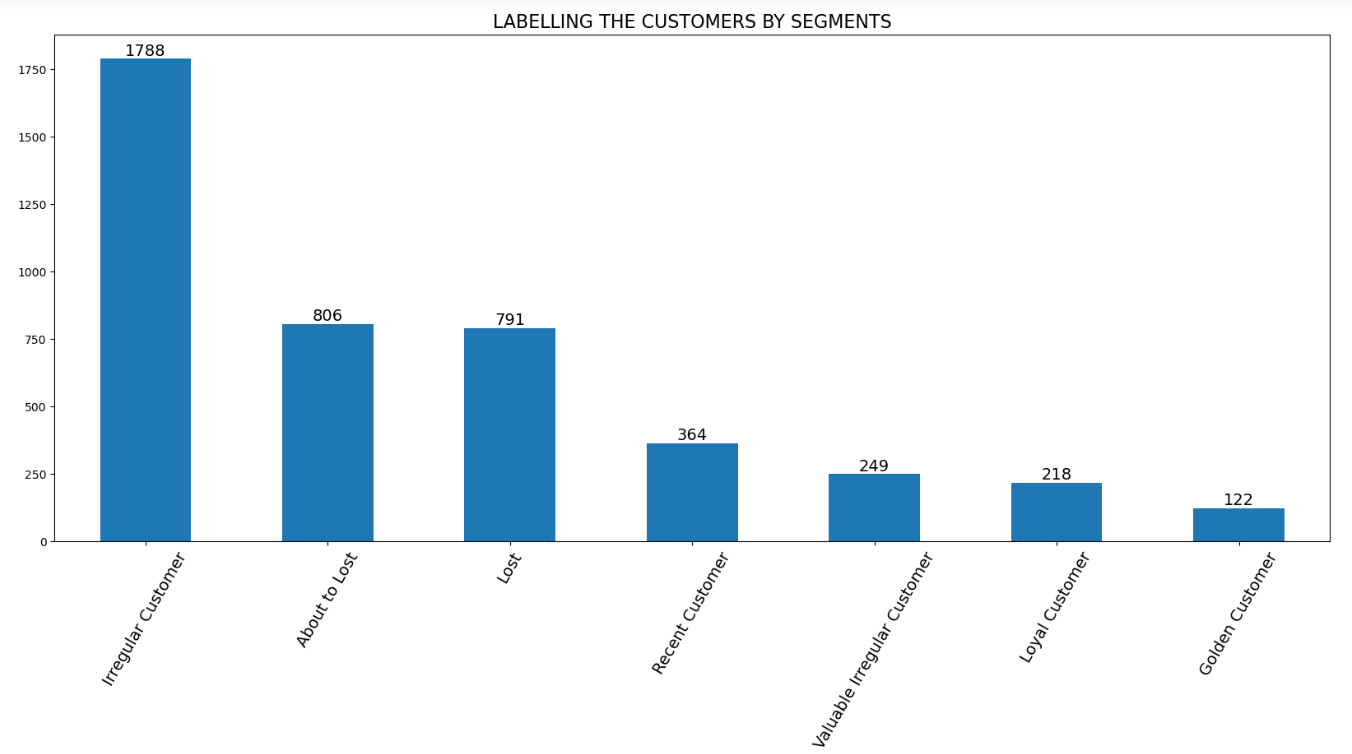

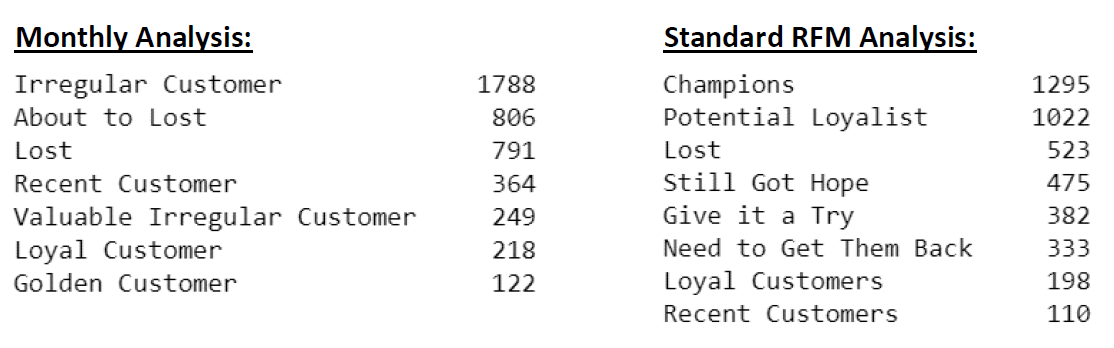

##  Create the montly spending table.

In [15]:
# Create a new column that contains the month and year to which each row belongs.
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

In [16]:
# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'YearMonth'])['Revenue'].sum().reset_index()

# Find how many months each customer shopped
monthly_spending['CountMonthsShopped'] = monthly_spending.groupby('CustomerID')['YearMonth'].transform('count')

# Calculate the monthly shopping percentages for customers (divide by the total number of months)
total_months = monthly_spending['YearMonth'].nunique()
monthly_spending['ShoppingPercentage'] = (monthly_spending['CountMonthsShopped'] / total_months) * 100

In [17]:
monthly_spending

,CustomerID,YearMonth,Revenue,CountMonthsShopped,ShoppingPercentage
0,12346.00,2011-01,77183.60,1,7.69
1,12347.00,2010-12,711.79,7,53.85
2,12347.00,2011-01,475.39,7,53.85
3,12347.00,2011-04,636.25,7,53.85
4,12347.00,2011-06,382.52,7,53.85
...,...,...,...,...,...
13049,18283.00,2011-10,112.99,10,76.92
13050,18283.00,2011-11,637.71,10,76.92
13051,18283.00,2011-12,208.00,10,76.92
13052,18287.00,2011-05,765.28,2,15.38


## Pivot montly spending table by "YearMonth" column and "Revenue" values. 

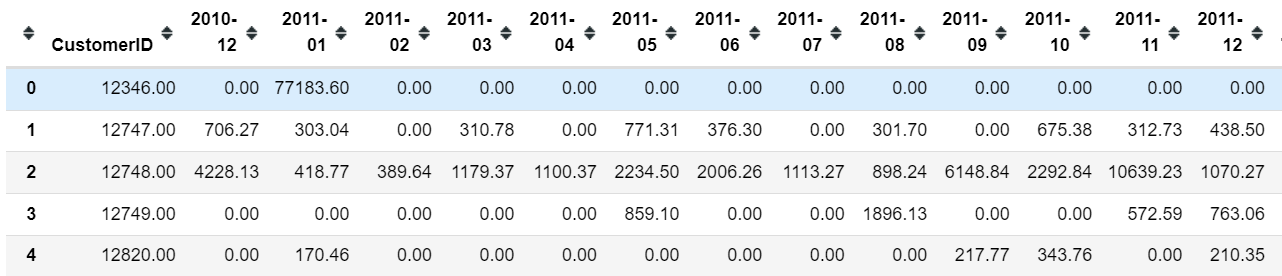

In [18]:
# Expand unique values of YearMonth as new columns and fill with Revenue values.
df_monthly_spending = monthly_spending.pivot(index='CustomerID', columns='YearMonth', values='Revenue').fillna(0)

In [19]:
df_monthly_spending

YearMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CustomerID,,,,,,,,,,,,,
12346.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12347.00,711.79,475.39,0.00,0.00,636.25,0.00,382.52,0.00,584.91,0.00,1294.32,0.00,224.82
12348.00,892.80,227.44,0.00,0.00,367.00,0.00,0.00,0.00,0.00,310.00,0.00,0.00,0.00
12349.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1757.55,0.00
12350.00,0.00,0.00,334.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.00,0.00,0.00,0.00,180.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18281.00,0.00,0.00,0.00,0.00,0.00,0.00,80.82,0.00,0.00,0.00,0.00,0.00,0.00
18282.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.21,0.00,0.00,0.00,77.84


## Calculate and add the total spendings of each Customer to the pivot table

In [20]:
# Add a new column by calculating the total sales for each customer
df_monthly_spending['TotalSales'] = df_monthly_spending.sum(axis=1)

In [21]:
df_monthly_spending

YearMonth,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,TotalSales
CustomerID,,,,,,,,,,,,,,
12346.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77183.60
12347.00,711.79,475.39,0.00,0.00,636.25,0.00,382.52,0.00,584.91,0.00,1294.32,0.00,224.82,4310.00
12348.00,892.80,227.44,0.00,0.00,367.00,0.00,0.00,0.00,0.00,310.00,0.00,0.00,0.00,1797.24
12349.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1757.55,0.00,1757.55
12350.00,0.00,0.00,334.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,334.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.00,0.00,0.00,0.00,180.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.60
18281.00,0.00,0.00,0.00,0.00,0.00,0.00,80.82,0.00,0.00,0.00,0.00,0.00,0.00,80.82
18282.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.21,0.00,0.00,0.00,77.84,178.05


## Add "CountMonthsShoped" and "ShoppingPercentage" features to pivot table.

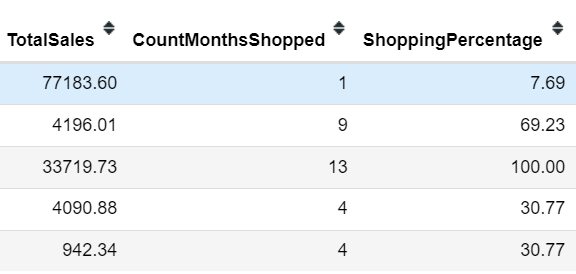

To create the table above, first we will create the shopping_counts_percentage_df below and then merge it with our pivot table df_monthly_spending.

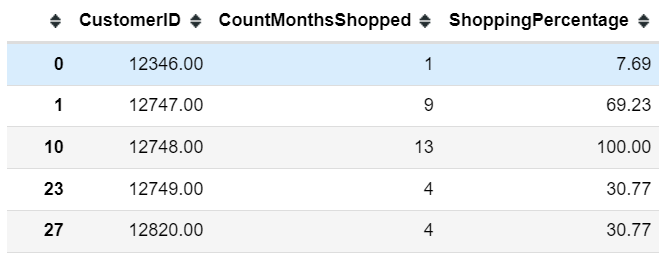

In [23]:
# Create a new DataFrame containing 'CustomerID', 'CountMonthsShopped', and 'ShoppingPercentage' columns
shopping_counts_percentage_df = monthly_spending[['CustomerID','CountMonthsShopped','ShoppingPercentage']].drop_duplicates()

In [24]:
shopping_counts_percentage_df

,CustomerID,CountMonthsShopped,ShoppingPercentage
0,12346.00,1,7.69
1,12347.00,7,53.85
8,12348.00,4,30.77
12,12349.00,1,7.69
13,12350.00,1,7.69
...,...,...,...
13038,18280.00,1,7.69
13039,18281.00,1,7.69
13040,18282.00,2,15.38
13042,18283.00,10,76.92


In [25]:
# Merge with df_monthly_spending using 'CustomerID' as the index
df_monthly_spending = df_monthly_spending.merge(shopping_counts_percentage_df, on='CustomerID', how='left')

In [26]:
pd.set_option('display.max_columns', 9)

In [27]:
df_monthly_spending

,CustomerID,2010-12,2011-01,2011-02,...,2011-12,TotalSales,CountMonthsShopped,ShoppingPercentage
0,12346.00,0.00,77183.60,0.00,...,0.00,77183.60,1,7.69
1,12347.00,711.79,475.39,0.00,...,224.82,4310.00,7,53.85
2,12348.00,892.80,227.44,0.00,...,0.00,1797.24,4,30.77
3,12349.00,0.00,0.00,0.00,...,0.00,1757.55,1,7.69
4,12350.00,0.00,0.00,334.40,...,0.00,334.40,1,7.69
...,...,...,...,...,...,...,...,...,...
4333,18280.00,0.00,0.00,0.00,...,0.00,180.60,1,7.69
4334,18281.00,0.00,0.00,0.00,...,0.00,80.82,1,7.69
4335,18282.00,0.00,0.00,0.00,...,77.84,178.05,2,15.38
4336,18283.00,0.00,213.75,100.95,...,208.00,2045.53,10,76.92


## Define Customer Segmentation Criteria/Conditions:

## Segment Customers by pre-defined criteria/conditions

In [28]:
# Define the conditions for customer segmentation
def customer_segment(row):
    last_three_months = row.iloc[-6:-3]   # the last three columns(-3) are not Date(Month) columns.
    last_seven_months = row.iloc[-10:-3]  
    
    if last_seven_months.eq(0).all():
        return "Lost"
    elif last_three_months.eq(0).all() and row.iloc[-9:-6].gt(0).any():
        return "About to Lost"
    elif row.iloc[1:12].eq(0).all() and row.iloc[12:14].gt(0).any():
        return "Recent Customer"
    elif (row['ShoppingPercentage'] >= 84) & (row['TotalSales'] >= df_monthly_spending['TotalSales'].quantile(0.80)):
        return "Golden Customer"
    elif last_three_months.gt(0).any() and row['ShoppingPercentage'] >= 60:
        return "Loyal Customer"
    elif last_three_months.gt(0).any() and row['ShoppingPercentage'] >= 40:
        return "Valuable Irregular Customer"
    else:
        return "Irregular Customer"

# Apply the customer_segment function to create the "CustomerSegment" column
df_monthly_spending['CustomerSegment'] = df_monthly_spending.apply(customer_segment, axis=1)

In [29]:
# Display the first few rows of the updated DataFrame
df_monthly_spending.head()

,CustomerID,2010-12,2011-01,2011-02,...,TotalSales,CountMonthsShopped,ShoppingPercentage,CustomerSegment
0,12346.00,0.00,77183.60,0.00,...,77183.60,1,7.69,Lost
1,12347.00,711.79,475.39,0.00,...,4310.00,7,53.85,Valuable Irregular Customer
2,12348.00,892.80,227.44,0.00,...,1797.24,4,30.77,About to Lost
3,12349.00,0.00,0.00,0.00,...,1757.55,1,7.69,Recent Customer
4,12350.00,0.00,0.00,334.40,...,334.40,1,7.69,Lost


In [30]:
df_monthly_spending.CustomerSegment.value_counts(ascending=False)

Irregular Customer             1788
About to Lost                   806
Lost                            791
Recent Customer                 364
Valuable Irregular Customer     249
Loyal Customer                  218
Golden Customer                 122
Name: CustomerSegment, dtype: int64

In [31]:
df_monthly_spending.CustomerSegment.value_counts().sum()

4338

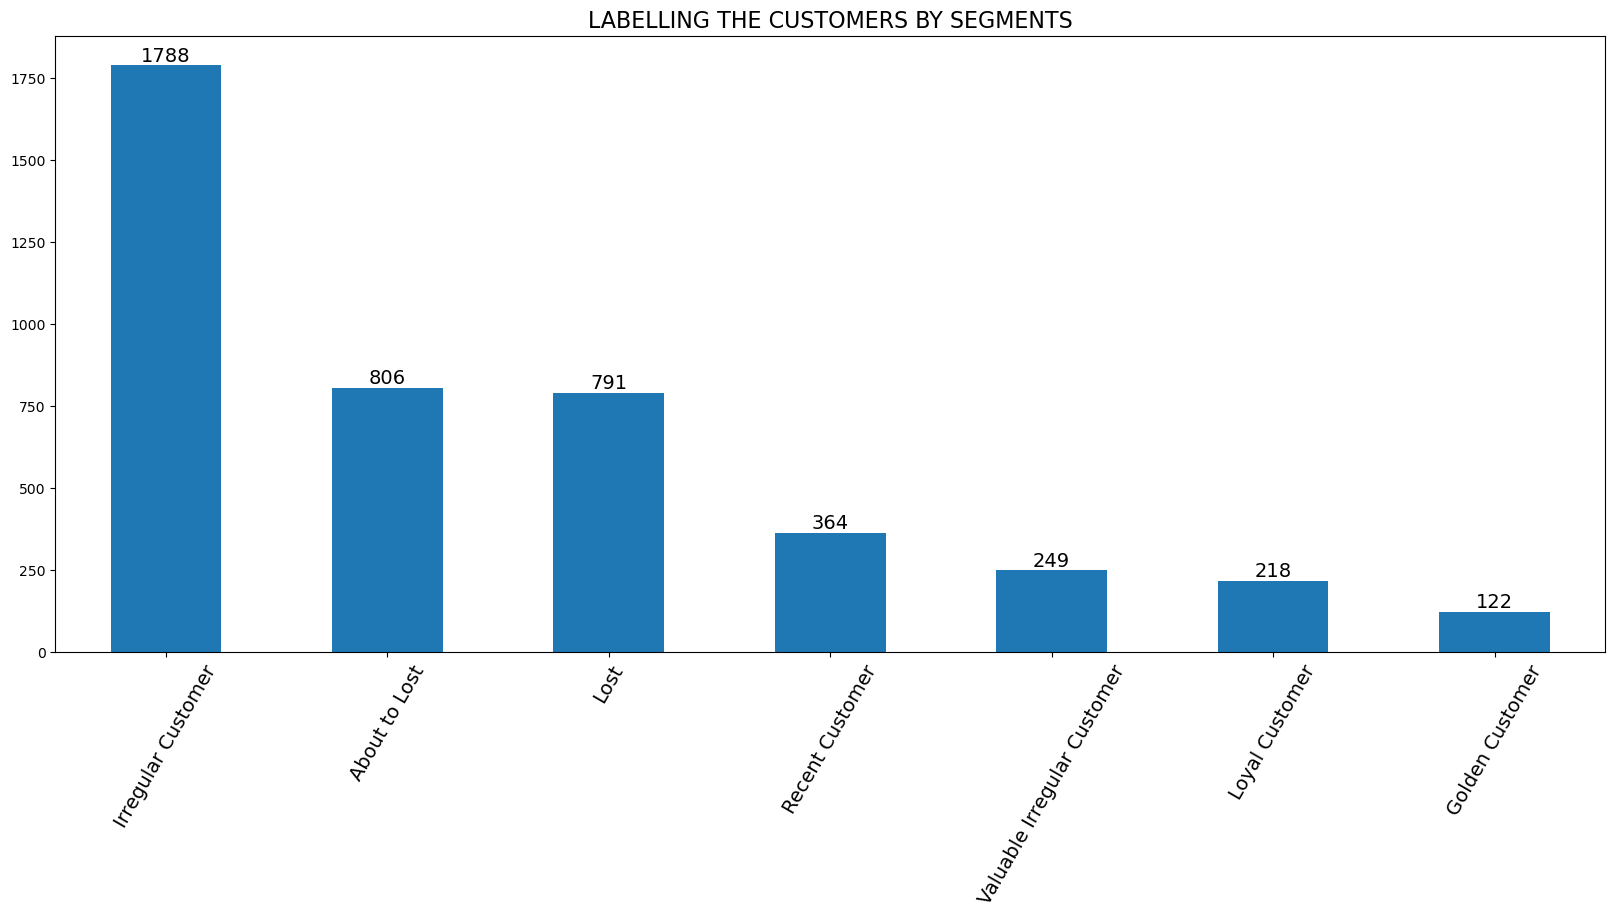

In [32]:
plt.figure(figsize=(20, 8))
ax=df_monthly_spending.CustomerSegment.value_counts().plot.bar()
plt.title("LABELLING THE CUSTOMERS BY SEGMENTS", fontsize=16)
# ax=df_monthly_spending.groupby(['CustomerSegment']).size().sort_values(ascending=False).plot.bar()
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", fontsize=14)
plt.xticks(rotation = 60, fontsize=14);

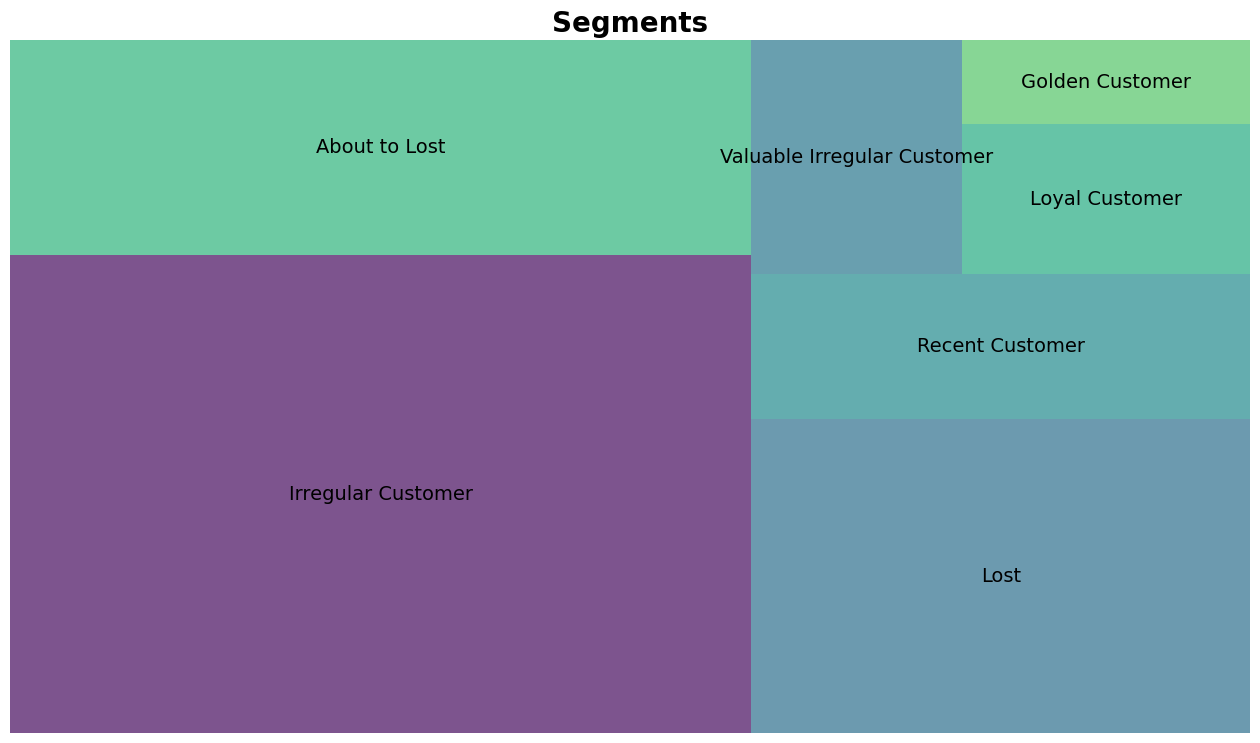

In [33]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=list(df_monthly_spending.CustomerSegment.value_counts().values), 
              label=list(df_monthly_spending.CustomerSegment.value_counts().index), alpha=0.7,
              text_kwargs={'fontsize':14})
plt.title("Segments", fontsize=20, fontweight="bold")
plt.axis('off')
plt.show()

In [34]:
df_monthly_spending.groupby('CustomerSegment').agg({'TotalSales':'mean','CountMonthsShopped':'mean'}).round(1)

,TotalSales,CountMonthsShopped
CustomerSegment,,
About to Lost,948.30,2.20
Golden Customer,23818.10,12.00
Irregular Customer,1360.60,2.70
Lost,613.60,1.30
Loyal Customer,5793.40,8.90
Recent Customer,487.30,1.10
Valuable Irregular Customer,3448.30,6.40


In [35]:
df_monthly_spending[(df_monthly_spending.CustomerSegment=="About to Lost")].sample(5)

,CustomerID,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,TotalSales,CountMonthsShopped,ShoppingPercentage,CustomerSegment
1877,14908.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,277.80,0.00,0.00,0.00,277.80,1,7.69,About to Lost
4171,18064.00,0.00,0.00,0.00,0.00,408.00,0.00,0.00,406.00,0.00,0.00,0.00,0.00,0.00,814.00,2,15.38,About to Lost
1914,14965.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,596.09,0.00,0.00,0.00,596.09,1,7.69,About to Lost
3252,16778.00,0.00,0.00,0.00,93.18,0.00,0.00,0.00,0.00,0.00,152.76,0.00,0.00,0.00,245.94,2,15.38,About to Lost
369,12816.00,0.00,0.00,0.00,0.00,0.00,0.00,318.65,0.00,0.00,253.55,0.00,0.00,0.00,572.20,2,15.38,About to Lost


# Conclusion:

                                                                                                     Ahmet Yüce       
                                                                                                     Data Scientist